In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook

# import elm functions
sys.path.append("../package/")
import ELM as elm

In [110]:
def g(x, I_s):
    c = 1.
    return 1.*x/(c + x/I_s) + 1.*(x/(c + x/I_s))**2 + 1.

#### sample generation from uniformly random generated sinc points
N = 1000  # sample size
X_train = np.random.uniform(-10.,10., N)
y_train = elm.sinc(X_train)+np.random.uniform(-0.2,0.2, N)

L = 100  # test size
X_test = np.random.uniform(-10.,10., L)
y_test = elm.sinc(X_test)+np.random.uniform(-0.2,0.2, L)

In [14]:
use_bias=False

n = 20
B, H, w, b = elm.ELM(X_train, y_train, n=n, g=g, ex_par=[1.], use_bias=use_bias)

t_train = elm.prediction(H, B)

In [5]:
H2 = elm.ELM_test(X_test, w, b, use_bias=use_bias, n=n)
t_test = elm.prediction(H2, B)

In [6]:
sqd_train = elm.loss(t_train,y_train)
sqd_test = elm.loss(t_test,y_test)

print(sqd_train/N, sqd_test/L)

0.12640463023673548 0.11053227341857406


<IPython.core.display.Javascript object>


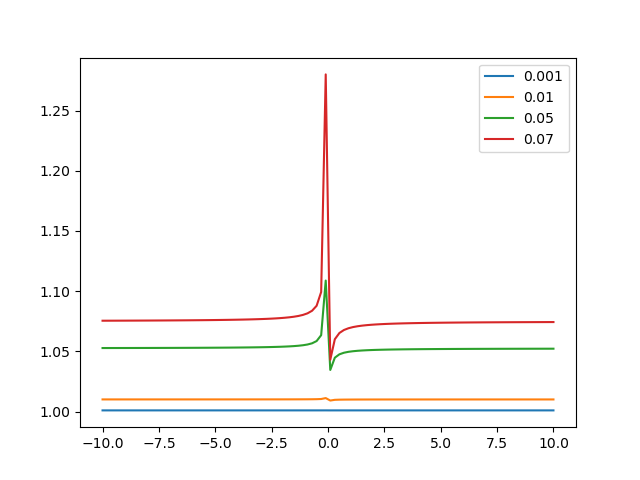

In [54]:
x = np.linspace(-10,10,100)
fig, axs = subplots(1)
for i in ([0.001, 0.01, 0.05, 0.07]):
    axs.plot(x, g(x, i), label=str(i))
    
axs.legend()

In [124]:
n = np.linspace(1,100, 50).astype("int")

use_bias=False

# sigmoid activation function
def sig(x):
    return 1/(1+np.exp(-x))

loss_train = np.zeros(n.shape[0])
loss_test = np.zeros(n.shape[0])

loss_train_sat = np.zeros(n.shape[0])
loss_test_sat = np.zeros(n.shape[0])
for node in range(n.shape[0]):
    B, H, w, b = elm.ELM(X_train, y_train, n=n[node], g=g, ex_par=[.07], use_bias=use_bias)
    t_train = elm.prediction(H, B)
    H2 = elm.ELM_test(X_test, w, b, g=g, ex_par=[.07], use_bias=use_bias, n=n[node])
    t_test = elm.prediction(H2, B)
    
    w_save = w
    
    loss_train_sat[node] = elm.loss(t_train, y_train)
    loss_test_sat[node] = elm.loss(t_test, y_test)
    
    B, H, w, b = elm.ELM(X_train, y_train, n=n[node],g=sig, use_bias=use_bias)
    t_train = elm.prediction(H, B)
    H2 = elm.ELM_test(X_test, w, b, g=sig, use_bias=use_bias, n=n[node])
    t_test_sig = elm.prediction(H2, B)
    
    loss_train[node] = elm.loss(t_train, y_train)
    loss_test[node] = elm.loss(t_test_sig, y_test)
    

<IPython.core.display.Javascript object>


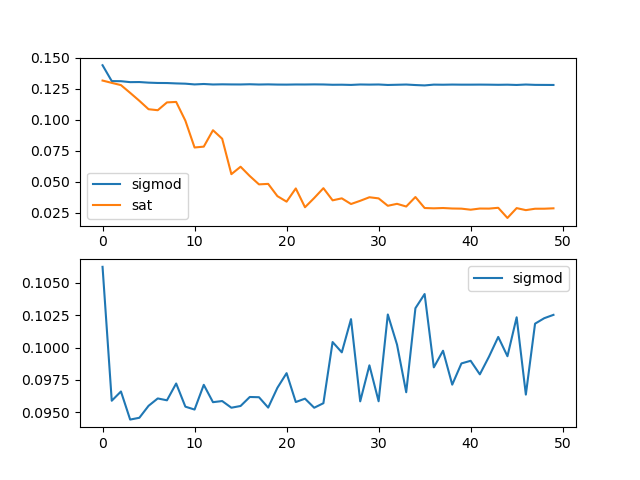

In [125]:
fig, axs = subplots(2)
axs[0].plot(loss_train/N, label="sigmod")
axs[0].plot(loss_train_sat/N, label="sat")

axs[1].plot(loss_test/L, label="sigmod")
#axs[1].plot(loss_test_sat/L, label="sat")

axs[0].legend()
axs[1].legend()


<IPython.core.display.Javascript object>


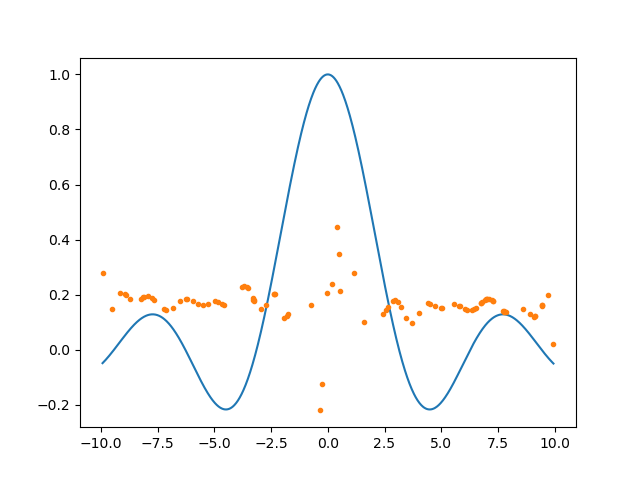

In [126]:
fig, axs = subplots(1)
#axs.plot(X_test, t_test, ".")
axs.plot(np.linspace(np.min(X_test),np.max(X_test), 1000), elm.sinc(np.linspace(np.min(X_test),np.max(X_test), 1000)))
axs.plot(X_test, t_test_sig, ".")


<IPython.core.display.Javascript object>


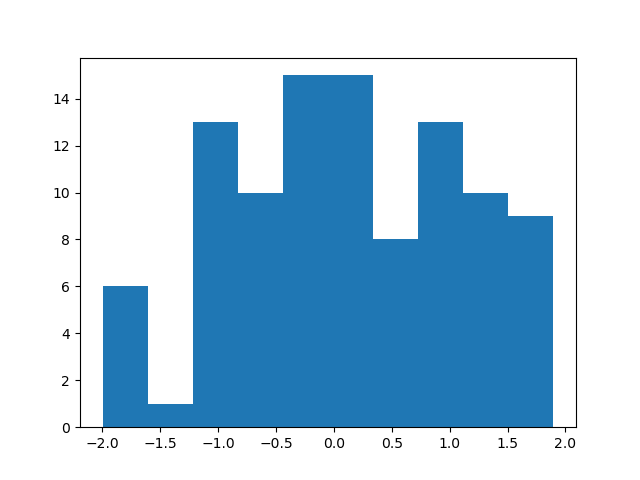

(array([ 6.,  1., 13., 10., 15., 15.,  8., 13., 10.,  9.]),
 array([-1.99814585, -1.6086676 , -1.21918935, -0.8297111 , -0.44023285,
        -0.0507546 ,  0.33872365,  0.7282019 ,  1.11768015,  1.5071584 ,
         1.89663665]),
 <BarContainer object of 10 artists>)

In [108]:
fig, axs = subplots(1)
axs.hist(w)